<a href="https://colab.research.google.com/github/magewade/Machine-Learning-MFTI-/blob/main/Copy_of_Copy_of_Pandas_Tutorial_edited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Pandas** **Tutorial** 

Привет! Мы с командой REU DS Club приготовили для тебя задания на проверку знаний библиотеки pandas.

Перед тем как перейти к выполнению заданий давай разберемся, когда и зачем мы используем pandas. 

Pandas - библиотека, предназначенная для анализа и структурирования данных. Она используется для предобработки данных: удаление строк, содержащих пропуски, преобразование категориальных данных в фиктивные, изменение структуры данных. Но это далеко не все! В функционал pandas также включается подгрузка данных, создание датафреймов, группировка данных и их статистический анализ.

Теперь перейдем к практической части. 

## Практика

### 1. Подгрузка библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### 2. Подгрузка данных

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Для анализа использованы данные соревнования Kaggle: Churn Prediction of bank customers [Ссылка](https://www.kaggle.com/code/kmalit/bank-customer-churn-prediction/data) 

Подгрузим данные файла Churn_Modeling.csv в виде датафрейма. Для этого вам нужно перейти по ссылке сверху и скачать данные с платформы Kaggle. Мы назвали переменную df не просто так, df опрещепринятое название и сокращение от dataframe, тоесть таблицы с данным. 


In [9]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Churn_Modelling.csv')

Постоянная подгрузка данных из памяти компьютера или из диска в Google collaboratory может быстро надоесть, поэтому часто этот процесс автоматизируют. Так например pandas может загружать таблицы с данными прямиком по ссылкам, но далеко не всегда. Например для kaggle это не пройдет, но можно автоматизировать процесс подключившись к их API, как это сделать можно прочитать [тут](https://www.kaggle.com/general/74235).

### 3. Предобработка данных

Для начала выведем 5 первых строк датафрейма. Для этого мы используем аттрибут .head(), в скобках можно указать нужное число выводимых строк. Также удалим признаки, которые можно считать не нужными при дальнейшем изучении. 

In [10]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

Выше мы указываем два параметра удаления, axis и inplace. первый отвечает за то удаляем ли мы столбец или строку. Так если указать axis=1, то удалится столбец. Второй параметр указывает pandas, вносить ли изменения сразу в данные или нет. В следующей строчке мы это продемонстрируем. Выведем сначала данные с удаленными колонками.

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df.drop(['Age'], axis=1, inplace=False)

,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,3,75075.31,2,1,0,92888.52,1


In [14]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Как мы видим указав inplace=False, мы не поменяли исходные данные, а снес временные изменения. Данный способ может понадобиться если вы хотите посмотреть как сработают ваши изменения над данными, без их фактического изменения. Кстати что бы вывести датафрейм, не обязательно использовать df.head(), можно обойтись и df.

А теперь давайте дадим вам небольшое задание, выведите в следующих двух строках сначала только последние 5 строк данных, а затем 5 случайных строк.

In [16]:
df[-5:]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


Теперь выведем основную информацию по таблице [столбцы; типы данных, используемых в них]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Не теряя темпа вот вам вторая задача, теперь нужно вывести тоже информацию о данных, только которая будет показывать среднее, максимально, минимальное зачение и тд. Чем то похоже на .info(), только называется по другому) 

Проверим данные на наличие в нем пропусков. Иногда случается так что данные могут содержать ошибки или пустые значения. Во втором случае есть много путей решения, но пока вам стоить знать, что при остуствующих значениях стоит воспользоваться df.fillna(тут на что вы хотите заменить)

In [18]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Работа с категориальными данными**

Работать со строчными значениями намного сложнее чем с цифрами, поэтому всегда лучше заменять их. Тут мы заменим в столбце Gender: Male на 1, Female на 0. 

In [ ]:
df.Gender.replace({'Male': 1, 'Female': 0}, inplace=True)

В случае выше мы обращаемся к столбцу Gender через точку после df. Так мы его выбираем и вносим изменения. Это удобно для одного столбца, а вот если мы хотим выбрать несколько то надо действовать по другому. Если вы выбираете один столбец то можно и без двойных [ ]

In [19]:
df[['Age', 'Gender']] # df['Age'] 

,Age,Gender
0,42,Female
1,41,Female
2,42,Female
3,39,Female
4,43,Female
...,...,...
9995,39,Male
9996,35,Male
9997,36,Female
9998,42,Male


### 4. Анализ данных

Выведем тип данных столбца Geography

In [20]:
df.Geography.dtypes

dtype('O')

Давайте посмотрим какие страны были включены в выборку. Для этого выведем уникальные значения по столбцу

In [ ]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
df.Geography.nunique()

3

Выведем последние 5 значений столбцов Geography, Gender, CreditScore. В pandas у каждого подхода к данным есть много вариантов. Для одного и того же вывода можно придумать множество путей.

1. Без использования iloc / loc

In [ ]:
df[['Geography', 'Gender', 'CreditScore']].tail()

,Geography,Gender,CreditScore
9995,France,1,771
9996,France,1,516
9997,France,0,709
9998,Germany,1,772
9999,France,0,792


2. C использованием iloc

In [ ]:
df.iloc[9995:9999, [2, 3, 1]]

,Gender,Age,Geography
9995,1,39,France
9996,1,35,France
9997,0,36,France
9998,1,42,Germany


3. С использованием loc

In [ ]:
df.loc[9995:9999, ['Geography', 'Gender', 'CreditScore']]

,Geography,Gender,CreditScore
9995,France,1,771
9996,France,1,516
9997,France,0,709
9998,Germany,1,772
9999,France,0,792


loc и iloc очень полезные методы, они позволяют быстро отфильтровать данные. В случае iloc на первом месте вы указываете индексы с каого по какой вы хотите вывести и номера столбцов. В случае с loc все тоже самое только вместо номеров столбцов их названия. Кстати четко прописывать индексы не всегда обязательно, можно просто оставить :, оно будет обозначать все значения. Так в примере все строки после индекса 9995

In [ ]:
df.loc[9995:, ['Geography', 'Gender', 'CreditScore']]

,Geography,Gender,CreditScore
9995,France,1,771
9996,France,1,516
9997,France,0,709
9998,Germany,1,772
9999,France,0,792


Посмотрим сколько людей старше 60 лет включено в выборку. Отфмлтруем данные и посчитаем их длину. Pandas умный и может считывать str запросы, для этого служит метод .query.


In [ ]:
len(df.loc[df.Age >= 60])

526

In [ ]:
len(df.query('Age >= 60'))

526

А теперь давайте сделаем более сложный запрос, выведите на экран всех людей родом из германии и с возрастом больше 40. Подсказка: чтобы добавить в loc два запроса их нужно выделить ( ) и между ними нужный вам логический оператор. Например или это |

Выведите средние значения столбцов, для которых это имеет смысл(тоесть сначала выделим столбцы с числами)

In [ ]:
df_num = df.select_dtypes(include=np.number)

In [ ]:
df_num.mean()

CreditScore           650.528800
Gender                  0.545700
Age                    38.921800
Tenure                  5.012800
Balance             76485.889288
NumOfProducts           1.530200
HasCrCard               0.705500
IsActiveMember          0.515100
EstimatedSalary    100090.239881
Exited                  0.203700
dtype: float64

Посчитаем корреляуию между признаками, если не знаете что это то лучше почитать в интернете. Если говорить грубо то в нашем примере это число показыаающие насколько сильно связаны два столбца между собой. 



In [ ]:
df_num.corr()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Gender,-0.002857,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,-0.106512,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


Тут мы выведем таблицу выше в более красивой форме с помощью сторонней библеотеки, которую затроним в другом ноутбуке.

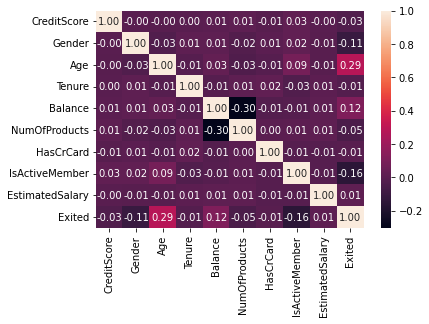

In [ ]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')

Выведем кол-во клиентов, c разбивкой по тому, есть у них кредитная карта или нет

In [ ]:
df.HasCrCard.value_counts(dropna=False)

1    7055
0    2945
Name: HasCrCard, dtype: int64

Теперь давайте выведем 5 клиентов с наибольшей заработной платой 


In [ ]:
df.nlargest(5, 'EstimatedSalary')

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6646,685,Spain,0,42,2,0.00,2,0,0,199992.48,0
3580,639,Germany,0,41,5,98635.77,1,1,0,199970.74,0
4417,608,Spain,1,27,4,153325.10,1,1,1,199953.33,0
9096,569,France,1,37,9,178755.84,1,1,0,199929.17,0
8926,620,France,1,28,8,0.00,2,1,1,199909.32,0


А вот и задание, с наибольшей заработной платой мы вывели, а теперь давайте выведем 25 с наименьшей зп, при этом посчитаем сколько из девушки, а сколько парни. (В выводе не удивляйтесь 1 и 0, так как ранее мы поменяли Female и Male на цифры)

Отсортируем по уровню заработной платы информацию о клиентах женского пола. Для этого мы сначала отфильруем данные, а затем применим сортиовку. ascending=False показвает нам, выводятся ли сверху самые большие знания по указанной колонке 'EstimatedSalary', или самые маленькие. Значение ascending=False указывает что сначала идут самые большие. 

In [ ]:
df[df.Gender == 0].sort_values('EstimatedSalary', ascending=False).head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6646,685,Spain,0,42,2,0.00,2,0,0,199992.48,0
3580,639,Germany,0,41,5,98635.77,1,1,0,199970.74,0
5958,540,France,0,40,3,165298.12,1,0,1,199862.75,0
1378,715,Spain,0,35,4,40169.88,2,1,1,199857.47,0
8088,541,Germany,0,39,9,100116.67,1,1,1,199808.10,1


Найдем среднее значение признаков с группировкой по полу и проанализируем полученные данные

In [ ]:
df.groupby('Gender').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,
0,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
1,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


А теперь сложнее, выведем агрегированную информацию по следующим признакам: Пол, Заработная плата, Кредитный рейтинг с группировкой по столбцу Exited (ушел клиент из банка или нет). Тут мы сначала выбираем нужные столбцы, затем разбиваем данные на две строки по колонке Exited(на две потом что у колонки всего 2 возможных значения: 0 или 1). А затем для фильрованных данных применяем агрегацию, указав какую функцию мы применим к столбцу, так это может быть 'mean'(среднее), 'max'(максимальное значение), 'sum'(сумма всех значений) и так далее. Можно указать функции и из библиотеки numpy, например np.mean.

In [ ]:
df[['Gender', 'EstimatedSalary', 'CreditScore', 'Exited']].groupby(['Exited']).agg(['mean', 'min'])

Gender     EstimatedSalary        CreditScore     
            mean min            mean    min        mean  min
Exited                                                      
0       0.572523   0    99738.391772  90.07  651.853196  405
1       0.440844   0   101465.677531  11.58  645.351497  350

А для закрепления возьмите столбцы 'Gender', 'EstimatedSalary', 'CreditScore', 'Geography', сгруппируйте их по значению 'Gender', 'Geography' и посмотрите среднее значение. Подсказка: groupby можт принмать и несколько столцов на вход.

Создадим новый датафрейм, где индексом является возраст, а признаки отражают средние значения Кредитного рейтинга и Баланс при данном возрасте. Pivot_table это тоже один из способов фильтрации данных.

In [ ]:
agg_df = df.pivot_table(index='Age', values=['CreditScore', 'Balance'])

In [ ]:
agg_df.head()

,Balance,CreditScore
Age,,
18,79169.57500,686.681818
19,70502.53963,665.629630
20,76038.89000,665.050000
21,75926.88283,647.283019
22,68213.74881,636.547619


Так в него тоже можно передавать функцию указывающую на то, какие значения ему нужно выводить. Так напрмер np.sum(сумма)

In [ ]:
agg_df = df.pivot_table(index='Age', values=['CreditScore', 'Balance'], aggfunc=np.sum)
agg_df.head()

,Balance,CreditScore
Age,,
18,1741730.65,15107
19,1903568.57,17972
20,3041555.60,26602
21,4024124.79,34306
22,5729954.90,53470


Выделите цветом столбец Age и EstimatedSalary (исп. style.set_properties). Да pandas умеет даже так, для визуализации полезно, хотя на практике используется не часто.

In [ ]:
df.head(10).style.set_properties(**{'background-color': 'brown'}, subset=['Age','EstimatedSalary'])

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.000000,1,1,1,101348.880000,1
1,608,Spain,0,41,1,83807.860000,1,0,1,112542.580000,0
2,502,France,0,42,8,159660.800000,3,1,0,113931.570000,1
3,699,France,0,39,1,0.000000,2,0,0,93826.630000,0
4,850,Spain,0,43,2,125510.820000,1,1,1,79084.100000,0
5,645,Spain,1,44,8,113755.780000,2,1,0,149756.710000,1
6,822,France,1,50,7,0.000000,2,1,1,10062.800000,0
7,376,Germany,0,29,4,115046.740000,4,1,0,119346.880000,1
8,501,France,1,44,4,142051.070000,2,0,1,74940.500000,0
9,684,France,1,27,2,134603.880000,1,1,1,71725.730000,0


Мы справились и обработали данные, но теперь нужно сохранить наши данные. В нашем ноутбуке нет сдложных вычеслений, но зачастую встречаются данные, где сложные фильтрации занимают по десять минут(особенно на слабых компьютерах). Поэтому сохранять прогресс важно. Pandas умеет делать это по разному, например формате csv, string, json

In [ ]:
df.to_csv("final_data.csv")

Последняя задача на сегодня, в практике встречается постоянно, ведь заказчики не разбираются в форматах по типу csv или json, зато все очень хорошо знают что такое excel. Поэтому все просто, сохраните df в формате excel.

На этом выполнения заданий подходит к концу. Если вы хотите побольше изучить функционал библиотеки pandas, ниже мы собрали для вас курсы и статьи, с которыми вы сможете ознакомиться в свободное время!

## Дополнительные ресурсы

1. 10-минутный гайд в Pandas от pandas.pydata (англ.) [Ссылка](https://pandas.pydata.org/docs/user_guide/10min.html)
2. Pandas Tutorial на Kaggle (англ.) [Ссылка](https://www.kaggle.com/learn/pandas)
3. Статья на Хабр (рус.) [Cсылка](https://habr.com/ru/company/ruvds/blog/494720/)
4. Сайт со всеми основными функциями Pandas [Ссылка](https://pandas.pydata.org/docs/reference/general_functions.html)